<a href="https://colab.research.google.com/github/juwimana/Trading/blob/main/Stock_Purchase_Valuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import packages
import datetime as dt
import pandas as pd

#visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#install mplfinance package
!pip install mplfinance
import mplfinance as mpf

#install python package yfinance
!pip install yfinance
import yfinance as yf

# import stock_info module from yahoo_fin
!pip install yahoo_fin
from yahoo_fin import stock_info as si

#styling package
from IPython.display import HTML

#currency formatting
import locale 
locale.setlocale(locale.LC_ALL, '')

In [2]:
start_date =dt.datetime(2020,10,1)
end_date = dt.date.today()
stock_data =''

#stock ticker
ticker = 'BA'
stock = yf.Ticker(ticker)
p_price = 11.51
shares = 10

In [3]:
#general stock prices
df_prices = yf.download(ticker, 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,170.149994,172.759995,165.570007,167.860001,167.860001,30677100
2020-10-02,161.860001,169.779999,161.800003,168.080002,168.080002,31773800
2020-10-05,169.490005,172.080002,167.509995,171.199997,171.199997,19082100
2020-10-06,173.039993,175.559998,159.330002,159.539993,159.539993,47132500
2020-10-07,163.710007,166.339996,162.380005,164.610001,164.610001,26019100


In [4]:
#get stock price historical data
h_stock = stock.history(period='max')
h_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1962-01-02,0.190310,0.190310,0.187037,0.187037,352200,0.0,0.0
1962-01-03,0.189843,0.193584,0.189843,0.190778,710400,0.0,0.0
1962-01-04,0.190778,0.194051,0.188908,0.188908,911000,0.0,0.0
1962-01-05,0.188908,0.189843,0.180023,0.185167,880400,0.0,0.0
1962-01-08,0.185167,0.188440,0.182829,0.185635,473600,0.0,0.0
...,...,...,...,...,...,...,...
2020-10-02,161.860001,169.779999,161.800003,168.080002,31773800,0.0,0.0
2020-10-05,169.490005,172.080002,167.509995,171.199997,19082100,0.0,0.0
2020-10-06,173.039993,175.559998,159.330002,159.539993,47132500,0.0,0.0


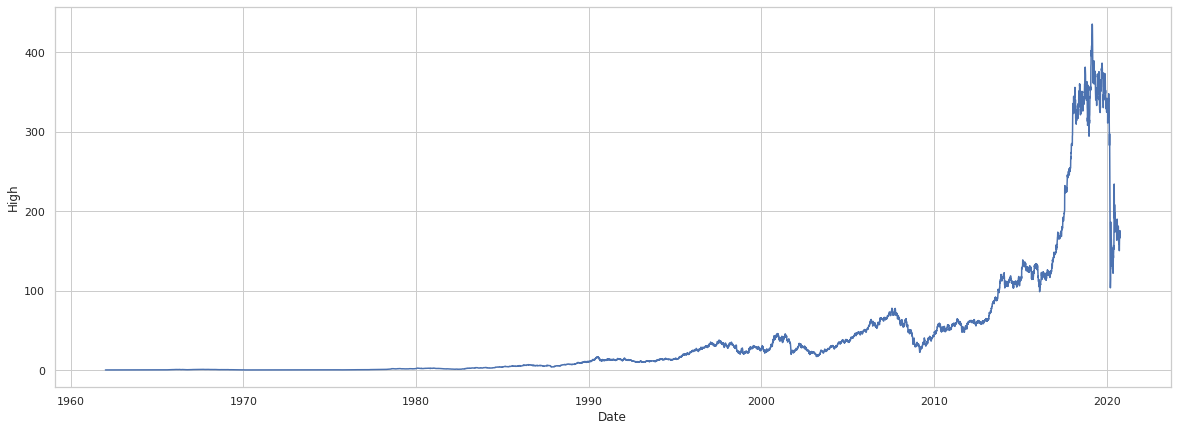

In [5]:
#plot historical data
plt.rcParams["figure.figsize"] = (20,7)
sns.set_theme(style="whitegrid")
sns.lineplot(data=h_stock.High, palette='tab10')

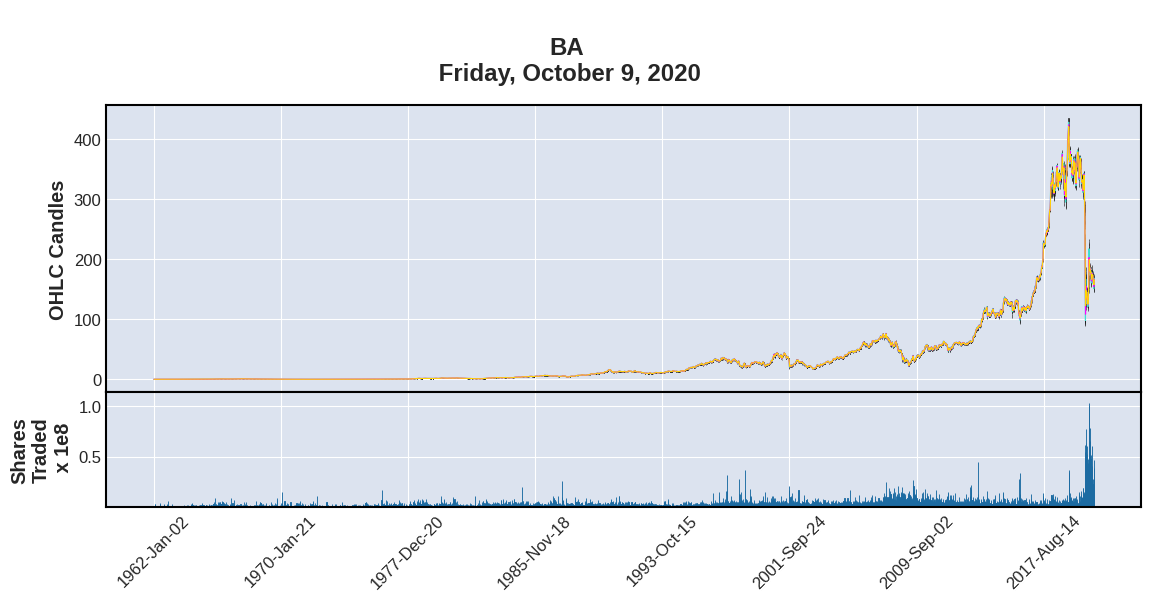

In [6]:
#plot stock historical data using mplfinance package
mpf.plot(h_stock,type='candle',mav=(3,6,9),volume=True, figratio=(25,10), 
         title='\n{}\n {}, {} {}, {}'.format(ticker,end_date.strftime('%A'), end_date.strftime("%B"), end_date.day, end_date.year),
         ylabel='OHLC Candles',
         ylabel_lower='Shares\nTraded'
         )

In [7]:
#incomplete url string
str_summary = 'https://finance.yahoo.com/quote/{}?p={}&.tsrc=fin-srch'
str_stat = 'https://finance.yahoo.com/quote/{}/key-statistics?p={}'
str_analysis = 'https://finance.yahoo.com/quote/{}/analysis?p={}'
str_financials= 'https://finance.yahoo.com/quote/{}/financials?p={}'

#complete website url
url_summary = str_summary.format(ticker,ticker)
url_stat = str_stat.format(ticker,ticker)
url_analysis = str_analysis.format(ticker,ticker)
url_financials = str_financials.format(ticker,ticker)
url_indexes = 'https://finance.yahoo.com/world-indices'

print(url_summary)
print(url_stat)
print(url_analysis)
print(url_financials)
print(url_indexes)

https://finance.yahoo.com/quote/BA?p=BA&.tsrc=fin-srch
https://finance.yahoo.com/quote/BA/key-statistics?p=BA
https://finance.yahoo.com/quote/BA/analysis?p=BA
https://finance.yahoo.com/quote/BA/financials?p=BA
https://finance.yahoo.com/world-indices


In [8]:
#DataFrame styling
def color_negative_red(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [9]:
#real-time US major index trend
df_indexes = pd.read_html(url_indexes, header = 0)
name = df_indexes[0].get('Name').to_frame()
d_change  = df_indexes[0].get('Change').to_frame()
p_change = df_indexes[0].get('% Change').to_frame()
last_price = df_indexes[0].get('Last Price').to_frame()
index_df = pd.concat([name, last_price ,d_change, p_change], axis=1, sort=False)
index_df[0:3]

,Name,Last Price,Change,% Change
0,S&P 500,3446.83,+27.38,+0.80%
1,Dow Jones Industrial Average,28425.51,+122.05,+0.43%
2,NASDAQ Composite,11420.98,+56.38,+0.50%


In [10]:
#read ticker financial summary page
df_summary = pd.read_html(url_summary, header = 0)
df_summary

[  Previous Close           164.61
 0           Open           166.22
 1            Bid     168.60 x 900
 2            Ask     168.95 x 900
 3    Day's Range  163.54 - 168.09
 4  52 Week Range   89.00 - 378.70
 5         Volume         20398647
 6    Avg. Volume         28471041,                  Market Cap       94.827B
 0         Beta (5Y Monthly)          1.38
 1            PE Ratio (TTM)           NaN
 2                 EPS (TTM)         -5.03
 3             Earnings Date  Oct 28, 2020
 4  Forward Dividend & Yield     N/A (N/A)
 5          Ex-Dividend Date  Feb 13, 2020
 6             1y Target Est        177.14]

In [11]:
summary_2 = df_summary[0]
summary_2

,Previous Close,164.61
0,Open,166.22
1,Bid,168.60 x 900
2,Ask,168.95 x 900
3,Day's Range,163.54 - 168.09
4,52 Week Range,89.00 - 378.70
5,Volume,20398647
6,Avg. Volume,28471041


In [12]:
summary_1 = df_summary[1]
summary_1

,Market Cap,94.827B
0,Beta (5Y Monthly),1.38
1,PE Ratio (TTM),NaN
2,EPS (TTM),-5.03
3,Earnings Date,"Oct 28, 2020"
4,Forward Dividend & Yield,N/A (N/A)
5,Ex-Dividend Date,"Feb 13, 2020"
6,1y Target Est,177.14


In [13]:
#read ticker financial statistics page
df_stat = pd.read_html(url_stat, header =0)
df_stat

[                    Unnamed: 0  ... 9/30/2019
 0      Market Cap (intraday) 5  ...   214.12B
 1           Enterprise Value 3  ...   223.73B
 2                 Trailing P/E  ...     44.40
 3                Forward P/E 1  ...     17.01
 4  PEG Ratio (5 yr expected) 1  ...      0.92
 5            Price/Sales (ttm)  ...      2.36
 6             Price/Book (mrq)  ...       NaN
 7   Enterprise Value/Revenue 3  ...     11.20
 8    Enterprise Value/EBITDA 6  ...    114.38
 
 [9 rows x 6 columns],           Beta (5Y Monthly)     1.38
 0          52-Week Change 3  -55.19%
 1   S&P500 52-Week Change 3   16.04%
 2            52 Week High 3   378.70
 3             52 Week Low 3    89.00
 4   50-Day Moving Average 3   165.60
 5  200-Day Moving Average 3   161.62,                               Avg Vol (3 month) 3   28.47M
 0                              Avg Vol (10 day) 3    29.1M
 1                            Shares Outstanding 5  564.32M
 2                                           Float  532.96M


In [14]:
len(df_stat)

10

In [15]:
stat_0 = df_stat[0]
stat_0

,Unnamed: 0,As of Date: 9/26/2020Current,6/30/2020,3/31/2020,12/31/2019,9/30/2019
0,Market Cap (intraday) 5,82.44B,103.46B,84.16B,183.37B,214.12B
1,Enterprise Value 3,111.39B,126.86B,101.43B,197.11B,223.73B
2,Trailing P/E,NaN,NaN,NaN,49.66,44.40
3,Forward P/E 1,31.85,NaN,35.09,16.31,17.01
4,PEG Ratio (5 yr expected) 1,6.53,NaN,5.16,0.99,0.92
5,Price/Sales (ttm),1.24,1.47,1.10,2.14,2.36
6,Price/Book (mrq),NaN,NaN,NaN,NaN,NaN
7,Enterprise Value/Revenue 3,1.67,10.74,6.00,11.01,11.20
8,Enterprise Value/EBITDA 6,-44.13,-54.61,-148.08,-133.91,114.38


In [16]:
stat_1 = df_stat[1]
stat_1

,Beta (5Y Monthly),1.38
0,52-Week Change 3,-55.19%
1,S&P500 52-Week Change 3,16.04%
2,52 Week High 3,378.70
3,52 Week Low 3,89.00
4,50-Day Moving Average 3,165.60
5,200-Day Moving Average 3,161.62


In [17]:
stat_5 = df_stat[5]
stat_5

,Profit Margin,-4.27%
0,Operating Margin (ttm),-5.01%


In [18]:
stat_6 = df_stat[6]
stat_6

,Return on Assets (ttm),-1.44%
0,Return on Equity (ttm),NaN


In [19]:
stat_8 = df_stat[8]
stat_8

,Total Cash (mrq),32.43B
0,Total Cash Per Share (mrq),57.45
1,Total Debt (mrq),61.38B
2,Total Debt/Equity (mrq),NaN
3,Current Ratio (mrq),1.41
4,Book Value Per Share (mrq),-20.67


In [20]:
#read ticker financial statistics page
df_analysis = pd.read_html(url_analysis, header =0)
df_analysis

[  Earnings Estimate  ...  Next Year (2021)
 0   No. of Analysts  ...             24.00
 1     Avg. Estimate  ...              3.93
 2      Low Estimate  ...             -3.10
 3     High Estimate  ...             11.47
 4      Year Ago EPS  ...             -9.64
 
 [5 rows x 5 columns],           Revenue Estimate  ... Next Year (2021)
 0          No. of Analysts  ...               24
 1            Avg. Estimate  ...           81.74B
 2             Low Estimate  ...           72.24B
 3            High Estimate  ...           94.37B
 4           Year Ago Sales  ...           61.22B
 5  Sales Growth (year/est)  ...           33.50%
 
 [6 rows x 5 columns],   Earnings History 9/29/2019 12/30/2019 3/30/2020 6/29/2020
 0         EPS Est.      2.09       1.47     -1.61     -2.54
 1       EPS Actual      1.45      -2.33      -1.7     -4.79
 2       Difference     -0.64       -3.8     -0.09     -2.25
 3       Surprise %   -30.60%   -258.50%    -5.60%   -88.60%,           EPS Trend  ...  Next Y

In [21]:
analysis_5 = df_analysis[5]
analysis_5

,Growth Estimates,BA,Industry,Sector(s),S&P 500
0,Current Qtr.,-260.00%,NaN,NaN,NaN
1,Next Qtr.,54.50%,NaN,NaN,NaN
2,Current Year,-177.80%,NaN,NaN,NaN
3,Next Year,140.80%,NaN,NaN,NaN
4,Next 5 Years (per annum),12.33%,NaN,NaN,NaN
5,Past 5 Years (per annum),11.23%,NaN,NaN,NaN


*   [Operating margin](https://www.investopedia.com/terms/o/operatingmargin.asp) is the profit a company makes on a dollar of sales after paying for variable costs but before paying any interest or taxes
*   [EPS](https://www.investopedia.com/terms/e/eps.asp) indicates how much money a company makes for each share of its stock
*   [Beta](https://www.investopedia.com/terms/b/beta.asp) is a measure of the volatility—or systematic risk—of a security or portfolio compared to the market as a whole
*   [Enterprise Value/EBITDA](https://www.investopedia.com/ask/answers/072715/what-considered-healthy-evebitda.asp#:~:text=The%20enterprise%2Dvalue%2Dto%2D,10%20are%20seen%20as%20healthy.) compares the value of a company—debt included—to the company’s cash earnings less non-cash expenses
*   [Return on equity (ROE)](https://www.investopedia.com/terms/r/returnonequity.asp) measures how effectively management is using a company’s assets to create profits
*   [Debt-to-Equity Ratio (D/E)](https://www.investopedia.com/terms/d/debtequityratio.asp) is a measure of the degree to which a company is financing its operations through debt versus wholly-owned funds

Note: GE stands for Growth Estimates per annum. For example, GE Next Year means growth estimates for next year.



In [24]:
#create stock key metrics DataFrame
stock_metrics= {
    'Company': stock.info.get('shortName'),
    'Ticker': ticker,
    'Sector': stock.info.get('sector'),
    '52 Week Low': stat_1.loc[3][1],
    '52 Week High': stat_1.loc[2][1],
    'Price': round(si.get_live_price(ticker),2),
    'Purchase Price': p_price,
    'Shares Owned': shares,
    'Capital Gain ($)': (round(si.get_live_price(ticker),2) - p_price)*shares,
    'Capital Gain (%)': "{:.2%}".format(((round(si.get_live_price(ticker),2) - p_price)*shares)/(p_price*shares)),
    'EPS' : summary_1.loc[2][1],
    'Beta' : stock.info.get('beta'),
    'Enterprise Value/EBITDA': stat_0.loc[8][1],
    'Operating Margin': stat_5.loc[0][1],
    'ROE':stat_6.loc[0][1],
    'Debt-to-Equity': stat_8.loc[2][1],
    'GE Next Year': analysis_5.loc[3][1],
    'GE Next 5 Years': analysis_5.loc[4][1],
    'GE Past 5 Years': analysis_5.loc[5][1]
    }
stock_df = pd.DataFrame(data = stock_metrics, index = [0])
stock_df

,Company,Ticker,Sector,52 Week Low,52 Week High,Price,Purchase Price,Shares Owned,Capital Gain ($),Capital Gain (%),EPS,Beta,Enterprise Value/EBITDA,Operating Margin,ROE,Debt-to-Equity,GE Next Year,GE Next 5 Years,GE Past 5 Years
0,Boeing Company (The),BA,Industrials,89.00,378.70,168.0,11.51,10,1564.9,1359.60%,-5.03,1.378378,-44.13,-5.01%,NaN,NaN,140.80%,12.33%,11.23%
